<a href="https://colab.research.google.com/github/jeffreyamal/Introduction-to-Python/blob/main/feb16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
dataframe = pd.read_csv("diabetes.csv")

In [3]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x=dataframe.drop("Outcome",1)
y=dataframe.Outcome

<ipython-input-5-d3cf22320488>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=dataframe.drop("Outcome",1)


In [6]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)


In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
predictedy = tree.predict(X_test)
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,predictedy)
print(accuracy)

0.70995670995671


In [33]:
from sklearn.tree import export_graphviz
from io import StringIO

In [28]:
dotdata = StringIO()
export_graphviz(tree,out_file=dotdata,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
print(dotdata.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<X<SUB>1</SUB> &le; 127.5<br/>gini = 0.45<br/>samples = 537<br/>value = [353, 184]<br/>class = 0>, fillcolor="#f3c3a0"] ;
1 [label=<X<SUB>7</SUB> &le; 28.5<br/>gini = 0.291<br/>samples = 334<br/>value = [275, 59]<br/>class = 0>, fillcolor="#eb9c63"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>5</SUB> &le; 30.9<br/>gini = 0.162<br/>samples = 191<br/>value = [174, 17]<br/>class = 0>, fillcolor="#e88d4c"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 7.5<br/>gini = 0.037<br/>samples = 107<br/>value = [105, 2]<br/>class = 0>, fillcolor="#e5833d"] ;
2 -> 3 ;
4 [label=<X<SUB>6</SUB> &le; 0.668<br/>gini = 0.019<br/>samples = 106<br/>value = [105, 1]<br/>class = 0>, fillcolor="#e5823b"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 92<br/>value = [92, 0]<br/>class = 0>, fillcolor="#e58139"] ;
4 -> 5 ;
6 [label=<X<SUB>5</SUB> &le; 2

In [29]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png("tree_for_diabetes.png")

True

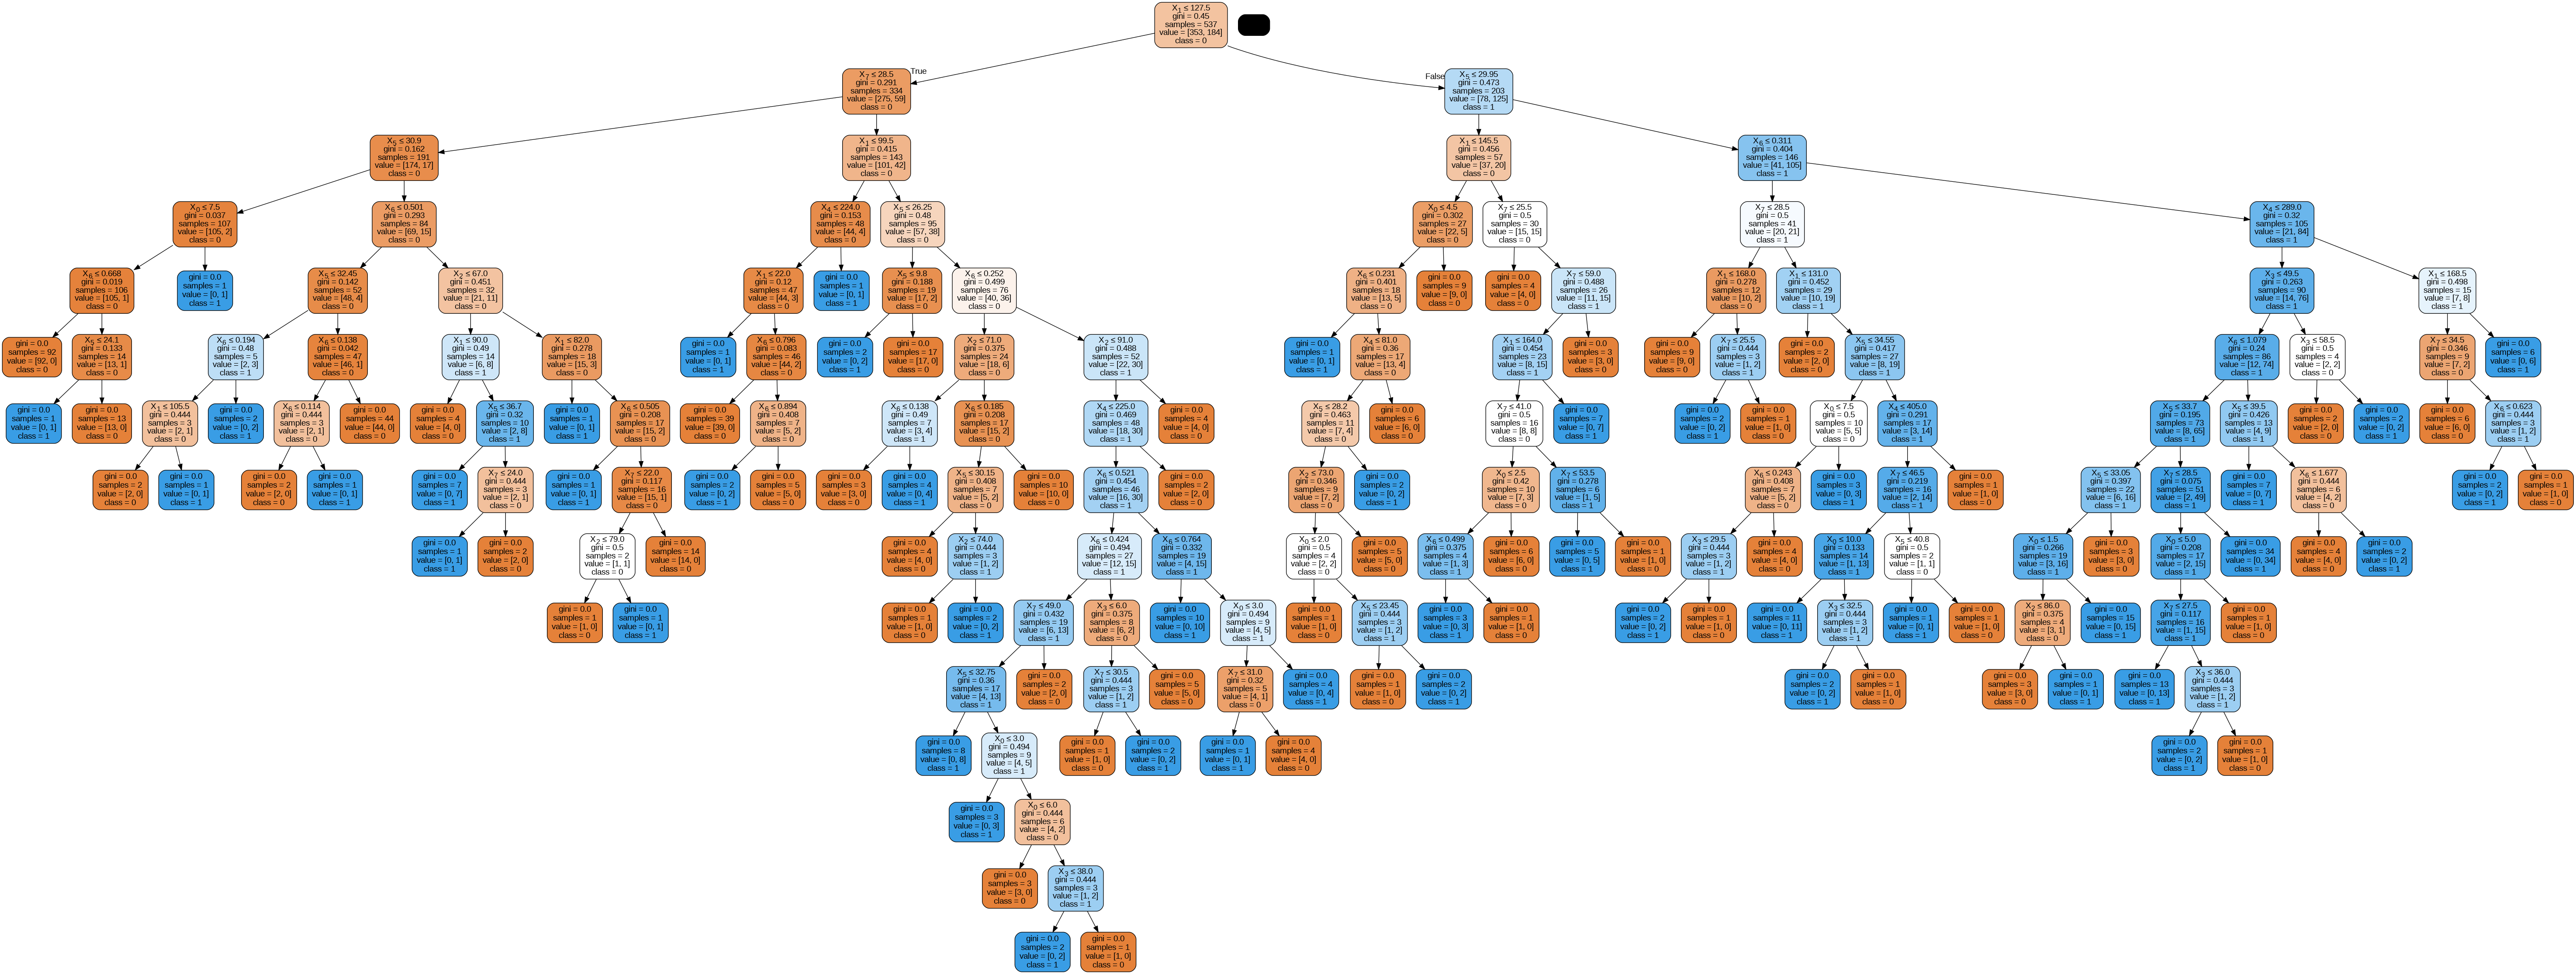

In [30]:
from IPython.display import Image
Image(graph.create_png())